<img src="assets/logo.png" width="250">
<br>

## Dean Alexander

### Dataset: Employee Resignation

Employees certainly are the most important asset of an organization. They are the ones working behind the scenes to ensure that your business functions seamlessly like a well-oiled machine. Hiring the best fit for an organization and ensuring that they stick with the company are two sides of the same coin. Employee resignations not only may lead to a minor hitch in the system, but it is also a major cost to the organization.

This case obtained from Kaggle [(Link Dataset)](https://www.kaggle.com/datasets/vaibhavnauriyal/hackerearth?resource=download&select=Train.csv). 

## Import Libraries 
The first stage in this analysis process is to prepare any libraries that can help us in processing the data. The following is a list of libraries that will be used:
- `pandas` : data reading, table aggregation, data manipulation, and other data analysis processes
- `numpy` : perform mathematical and logical operations
- `random` : perform random values for the process needs to artificially create missing values
- `matplotlib.pyplot` : create visualization to see the correlation value
- `seaborn` : making statistical graphics
- `sklearn.metrics` : measure prediction performance

In [46]:
import warnings
warnings.filterwarnings("ignore")

In [47]:
import pandas as pd
df=pd.read_csv('data\Train.csv', index_col=0)
df.head()

,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,growth_rate,...,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate
Employee_ID,,,,,,,,,,,,,,,,,,,,,
EID_23371,F,42.0,4,Married,Franklin,IT,Conceptual,4.0,4,33,...,type2,3.0,4,0.7516,1.8688,2.0,4,5,3,0.1841
EID_18000,M,24.0,3,Single,Springfield,Logistics,Analytical,5.0,4,36,...,type2,4.0,3,-0.9612,-0.4537,2.0,3,5,3,0.0670
EID_3891,F,58.0,3,Married,Clinton,Quality,Conceptual,27.0,3,51,...,type2,1.0,4,-0.9612,-0.4537,3.0,3,8,3,0.0851
EID_17492,F,26.0,3,Single,Lebanon,Human Resource Management,Behavioral,4.0,3,56,...,type2,1.0,3,-1.8176,-0.4537,NaN,3,7,3,0.0668
EID_22534,F,31.0,1,Married,Springfield,Logistics,Conceptual,5.0,4,62,...,type3,3.0,1,0.7516,-0.4537,2.0,2,8,2,0.1827


### Check type of data in dataframe

In [48]:
df.dtypes

Gender                        object
Age                          float64
Education_Level                int64
Relationship_Status           object
Hometown                      object
Unit                          object
Decision_skill_possess        object
Time_of_service              float64
Time_since_promotion           int64
growth_rate                    int64
Travel_Rate                    int64
Post_Level                     int64
Pay_Scale                    float64
Compensation_and_Benefits     object
Work_Life_balance            float64
VAR1                           int64
VAR2                         float64
VAR3                         float64
VAR4                         float64
VAR5                           int64
VAR6                           int64
VAR7                           int64
Attrition_rate               float64
dtype: object

The following columns do not yet have the correct data type.

> `Employee_ID`, `Gender`, `Relationship_Status`, `Hometown`,`Unit`, `Decision_skill_possess`, `Compensation_and_Benefits`

### Adjust Data Type
It is necessary to adjust the data which will later be used in the `cat_codes` function because the purpose is to change the numeric type

In [49]:
#Adjust Data Type object to Category
cat_pro = df.select_dtypes('object').columns
df[cat_pro] = df[cat_pro].astype('category')

In [50]:
df.dtypes

Gender                       category
Age                           float64
Education_Level                 int64
Relationship_Status          category
Hometown                     category
Unit                         category
Decision_skill_possess       category
Time_of_service               float64
Time_since_promotion            int64
growth_rate                     int64
Travel_Rate                     int64
Post_Level                      int64
Pay_Scale                     float64
Compensation_and_Benefits    category
Work_Life_balance             float64
VAR1                            int64
VAR2                          float64
VAR3                          float64
VAR4                          float64
VAR5                            int64
VAR6                            int64
VAR7                            int64
Attrition_rate                float64
dtype: object

### Check Correlation

<AxesSubplot: >

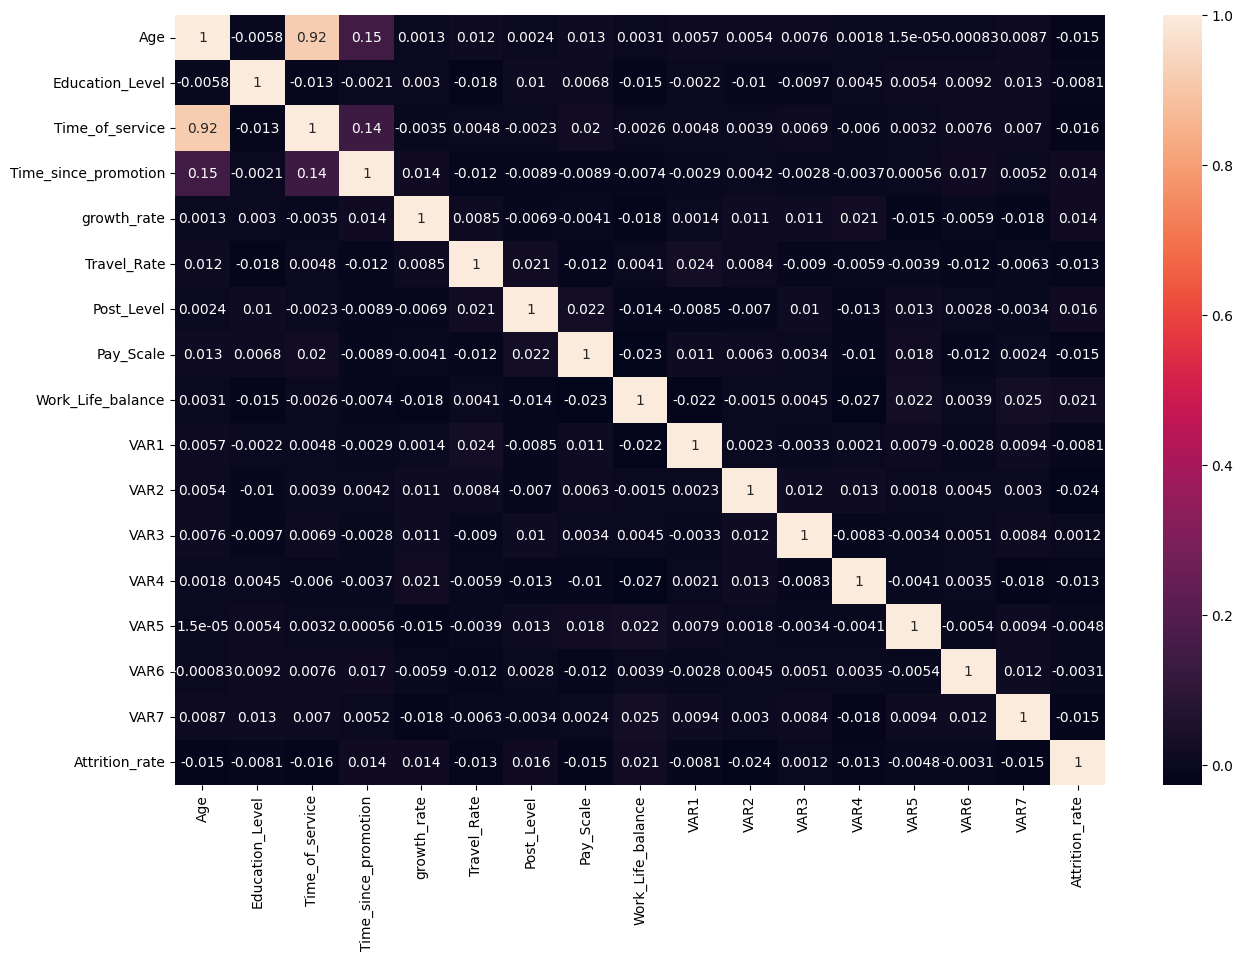

In [51]:
#Correlation heatmap
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(numeric_only=True), annot = True)

Insight = 
> It can be seen that the column relationship between Time of Service and Age is very strong, close to 1, which means that if Age increases, the Time of Service also increases

> The same thing happened between time since promotion with Age and Time of service even though it was in the category of positive weak correlation

### Check Missing Value on Original Dataset
Before data pre-processing, checking for missing values is carried out on the original dataset.

In [52]:
df.isnull().sum()

Gender                         0
Age                          412
Education_Level                0
Relationship_Status            0
Hometown                       0
Unit                           0
Decision_skill_possess         0
Time_of_service              144
Time_since_promotion           0
growth_rate                    0
Travel_Rate                    0
Post_Level                     0
Pay_Scale                      9
Compensation_and_Benefits      0
Work_Life_balance             11
VAR1                           0
VAR2                         577
VAR3                           0
VAR4                         656
VAR5                           0
VAR6                           0
VAR7                           0
Attrition_rate                 0
dtype: int64

The following column has an empty data type.
> `Age`,`Time_of_service`,`Time_of_service`,`VAR2`,`VAR4`

### Removing the Missing Value
Delete the row containing the missing value, and save it with the object name `df_full` with default how=all 

In [53]:
df_full = df.dropna()

In [54]:
df_full.isna().sum()

Gender                       0
Age                          0
Education_Level              0
Relationship_Status          0
Hometown                     0
Unit                         0
Decision_skill_possess       0
Time_of_service              0
Time_since_promotion         0
growth_rate                  0
Travel_Rate                  0
Post_Level                   0
Pay_Scale                    0
Compensation_and_Benefits    0
Work_Life_balance            0
VAR1                         0
VAR2                         0
VAR3                         0
VAR4                         0
VAR5                         0
VAR6                         0
VAR7                         0
Attrition_rate               0
dtype: int64

### Encode
Encode categorical features

In [55]:
def cat_codes(df):
    for col in df.select_dtypes(include='category').columns:
        df[col] = df[col].cat.codes

In [56]:
cat_codes(df_full)

### Artificially Create Missing Value

In [57]:
df_full.head()

,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,growth_rate,...,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate
Employee_ID,,,,,,,,,,,,,,,,,,,,,
EID_23371,0,42.0,4,0,1,2,2,4.0,4,33,...,2,3.0,4,0.7516,1.8688,2.0,4,5,3,0.1841
EID_18000,1,24.0,3,1,3,3,0,5.0,4,36,...,2,4.0,3,-0.9612,-0.4537,2.0,3,5,3,0.0670
EID_3891,0,58.0,3,0,0,8,2,27.0,3,51,...,2,1.0,4,-0.9612,-0.4537,3.0,3,8,3,0.0851
EID_22534,0,31.0,1,0,3,3,2,5.0,4,62,...,3,3.0,1,0.7516,-0.4537,2.0,2,8,2,0.1827
EID_2278,1,54.0,3,0,2,7,2,19.0,1,21,...,2,1.0,3,-1.8176,1.8688,2.0,2,8,3,0.7613


In [58]:
import random
import numpy as np
df_1 = df_full.copy()

random.seed(123)

ix = [(row, col) for row in range(df_1.shape[0]) for col in range(df_1.shape[1])]
for row, col in random.sample(ix, int(round(.1*len(ix)))):
    if (col ==  1) | (col ==  7) | (col ==  12) | (col ==  14) | (col ==  16) | (col ==  18):
        df_1.iat[row, col] = np.nan

### Check  Missing Value
The missing value check is again performed on `df_1`.

In [59]:
df_1.isna().sum()

Gender                         0
Age                          564
Education_Level                0
Relationship_Status            0
Hometown                       0
Unit                           0
Decision_skill_possess         0
Time_of_service              529
Time_since_promotion           0
growth_rate                    0
Travel_Rate                    0
Post_Level                     0
Pay_Scale                    518
Compensation_and_Benefits      0
Work_Life_balance            558
VAR1                           0
VAR2                         541
VAR3                           0
VAR4                         537
VAR5                           0
VAR6                           0
VAR7                           0
Attrition_rate                 0
dtype: int64

In [60]:
df_1.dtypes

Gender                          int8
Age                          float64
Education_Level                int64
Relationship_Status             int8
Hometown                        int8
Unit                            int8
Decision_skill_possess          int8
Time_of_service              float64
Time_since_promotion           int64
growth_rate                    int64
Travel_Rate                    int64
Post_Level                     int64
Pay_Scale                    float64
Compensation_and_Benefits       int8
Work_Life_balance            float64
VAR1                           int64
VAR2                         float64
VAR3                         float64
VAR4                         float64
VAR5                           int64
VAR6                           int64
VAR7                           int64
Attrition_rate               float64
dtype: object

### Imputation
The imputation was carried out using 2 techniques, namely statistical and MICE

### - Statistical

In [61]:
df_1.head(1500)

,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,growth_rate,...,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate
Employee_ID,,,,,,,,,,,,,,,,,,,,,
EID_23371,0,42.0,4,0,1,2,2,4.0,4,33,...,2,3.0,4,0.7516,1.8688,2.0,4,5,3,0.1841
EID_18000,1,24.0,3,1,3,3,0,5.0,4,36,...,2,4.0,3,-0.9612,-0.4537,2.0,3,5,3,0.0670
EID_3891,0,58.0,3,0,0,8,2,27.0,3,51,...,2,1.0,4,-0.9612,-0.4537,3.0,3,8,3,0.0851
EID_22534,0,31.0,1,0,3,3,2,5.0,4,62,...,3,3.0,1,0.7516,-0.4537,2.0,2,8,2,0.1827
EID_2278,1,54.0,3,0,2,7,2,19.0,1,21,...,2,1.0,3,-1.8176,1.8688,2.0,2,8,3,0.7613
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
EID_19737,0,37.0,3,1,4,9,2,13.0,3,36,...,2,4.0,3,-0.1048,0.7075,2.0,2,8,3,0.2101
EID_11312,0,37.0,2,0,1,9,2,14.0,3,58,...,3,3.0,3,-0.9612,0.7075,2.0,3,7,3,0.0812
EID_16468,0,28.0,3,0,2,7,0,4.0,4,55,...,2,NaN,3,-0.1048,0.7075,2.0,3,7,3,0.0082


### Check Missing Value

In [62]:
df_1.isnull().sum()/len(df_1)*100

Gender                        0.000000
Age                          10.536148
Education_Level               0.000000
Relationship_Status           0.000000
Hometown                      0.000000
Unit                          0.000000
Decision_skill_possess        0.000000
Time_of_service               9.882309
Time_since_promotion          0.000000
growth_rate                   0.000000
Travel_Rate                   0.000000
Post_Level                    0.000000
Pay_Scale                     9.676817
Compensation_and_Benefits     0.000000
Work_Life_balance            10.424061
VAR1                          0.000000
VAR2                         10.106482
VAR3                          0.000000
VAR4                         10.031758
VAR5                          0.000000
VAR6                          0.000000
VAR7                          0.000000
Attrition_rate                0.000000
dtype: float64

Insight = The data attached to df_1 results from df dropna, it can be seen that the percentage of each selected column has a missing value that is close to 10%

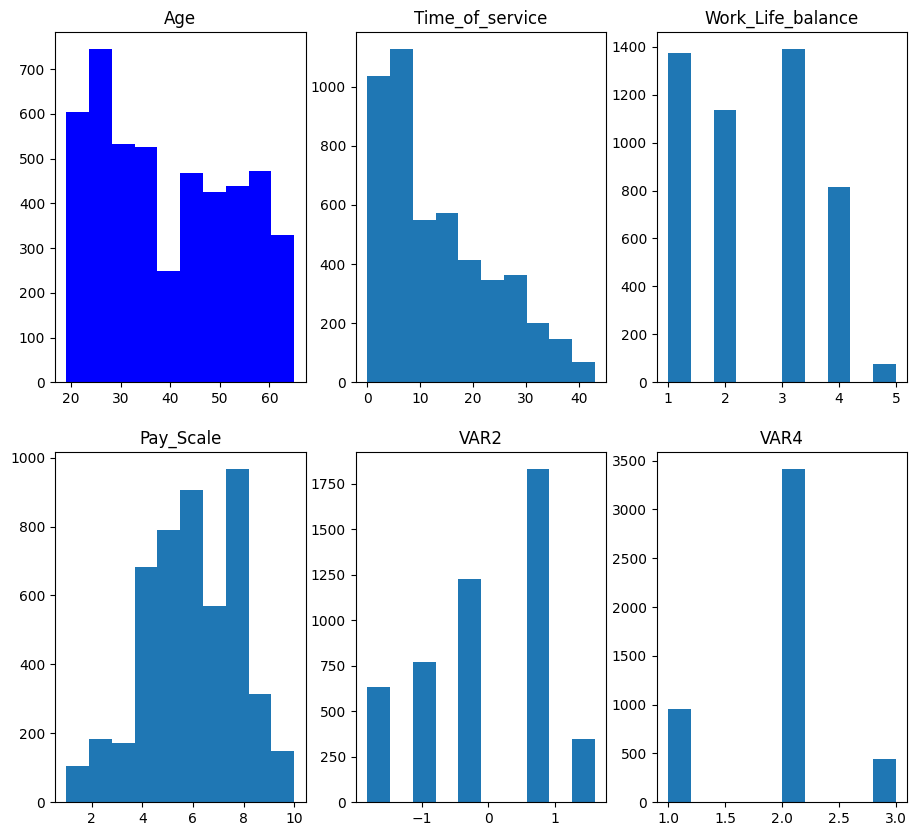

In [63]:
import matplotlib.pyplot as plt

# Membuat figure dengan ukuran (11,10)
fig = plt.figure(figsize=(11,10))

# Membuat 5 area plot di dalam satu figure dengan 3 baris dan 3 kolom
ax1 = fig.add_subplot(2,3,1)
ax2 = fig.add_subplot(2,3,2)
ax3 = fig.add_subplot(2,3,3)
ax4 = fig.add_subplot(2,3,4)
ax5 = fig.add_subplot(2,3,5)
ax6 = fig.add_subplot(2,3,6)

# Membuat hist di masing-masing area hist
ax1.hist(df_1['Age'], color = 'blue')
ax2.hist(df_1['Time_of_service'])
ax3.hist(df_1['Work_Life_balance'])
ax4.hist(df_1['Pay_Scale'])
ax5.hist(df_1['VAR2'])
ax6.hist(df_1['VAR4'])

# Membuat nama masing masing grafik
ax1.set_title('Age')
ax2.set_title('Time_of_service')
ax3.set_title('Work_Life_balance')
ax4.set_title('Pay_Scale')
ax5.set_title('VAR2')
ax6.set_title('VAR4')

# Menampilkan figure
plt.show()


#### Using statistical techniques by applying imputation with:
- `Age` : `median` (Data from the histogram graph shows that data is not normally distributed)
- `Time_of_Service` : `median` (Data from the histogram graph shows that data is not normally distributed)
- `Pay_Scale` : `median` (Data from the histogram graph shows that data is not normally distributed)
- `work_life_balance` : `mode/modus` (Because the value range is 1-5, the numbers that appear frequently are taken)
- `Var 2 & Var 4` : `mode` (Because the value range is 1-5, numbers that appear frequently are taken)

In [64]:
# Copy data to obesity_statistical_imputed
df_1_stats = df_1.copy()

In [65]:
df_1_stats.dtypes

Gender                          int8
Age                          float64
Education_Level                int64
Relationship_Status             int8
Hometown                        int8
Unit                            int8
Decision_skill_possess          int8
Time_of_service              float64
Time_since_promotion           int64
growth_rate                    int64
Travel_Rate                    int64
Post_Level                     int64
Pay_Scale                    float64
Compensation_and_Benefits       int8
Work_Life_balance            float64
VAR1                           int64
VAR2                         float64
VAR3                         float64
VAR4                         float64
VAR5                           int64
VAR6                           int64
VAR7                           int64
Attrition_rate               float64
dtype: object

In [1]:
# Prepare imputer
from sklearn.impute import SimpleImputer
median_imputer = SimpleImputer(strategy='median')
mode_imputer = SimpleImputer(strategy='most_frequent')

In [67]:
# convert NA Age
df_1_stats['Age'] = median_imputer.fit_transform(df_1_stats['Age'].values.reshape(-1,1))

# convert NA Time_of_Service
df_1_stats['Time_of_service'] = median_imputer.fit_transform(df_1_stats['Time_of_service'].values.reshape(-1,1))

# convert NA work_life_balance
df_1_stats['Work_Life_balance'] = mode_imputer.fit_transform(df_1_stats['Work_Life_balance'].values.reshape(-1,1))

# convert NA pay_scale
df_1_stats['Pay_Scale'] = mode_imputer.fit_transform(df_1_stats['Pay_Scale'].values.reshape(-1,1))

# convert NA var2 * var4
df_1_stats['VAR2'] = mode_imputer.fit_transform(df_1_stats['VAR2'].values.reshape(-1,1))
df_1_stats['VAR4'] = mode_imputer.fit_transform(df_1_stats['VAR4'].values.reshape(-1,1))

In [68]:
# check missing value after imputation
df_1_stats.isnull().sum()

Gender                       0
Age                          0
Education_Level              0
Relationship_Status          0
Hometown                     0
Unit                         0
Decision_skill_possess       0
Time_of_service              0
Time_since_promotion         0
growth_rate                  0
Travel_Rate                  0
Post_Level                   0
Pay_Scale                    0
Compensation_and_Benefits    0
Work_Life_balance            0
VAR1                         0
VAR2                         0
VAR3                         0
VAR4                         0
VAR5                         0
VAR6                         0
VAR7                         0
Attrition_rate               0
dtype: int64

In [69]:
df_1_stats.head()

,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,growth_rate,...,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate
Employee_ID,,,,,,,,,,,,,,,,,,,,,
EID_23371,0,42.0,4,0,1,2,2,4.0,4,33,...,2,3.0,4,0.7516,1.8688,2.0,4,5,3,0.1841
EID_18000,1,24.0,3,1,3,3,0,5.0,4,36,...,2,4.0,3,-0.9612,-0.4537,2.0,3,5,3,0.0670
EID_3891,0,58.0,3,0,0,8,2,27.0,3,51,...,2,1.0,4,-0.9612,-0.4537,3.0,3,8,3,0.0851
EID_22534,0,31.0,1,0,3,3,2,5.0,4,62,...,3,3.0,1,0.7516,-0.4537,2.0,2,8,2,0.1827
EID_2278,1,54.0,3,0,2,7,2,19.0,1,21,...,2,1.0,3,-1.8176,1.8688,2.0,2,8,3,0.7613


> Insight: Statistical methods have succeeded in filling in the three missing columns

### - MICE

The implementation of MICE is done by using the `sklearn` library.  

In `sklearn`, the MICE algorithm is named as `IterativeImputer`.

The steps taken are:
- Copy `data_mv` to `obesity_mice_imputed`
- Initialize `IterativeImputer` with name `mice_imputer`
- Impute using `fit_transform` on data

Documentation : [sklearn.impute.IterativeImputer](https://scikit-learn.org/stable/modules/generated/sklearn.impute.IterativeImputer.html)

In [70]:
# Copy data to obesity_mice
df_1_mice = df_1.copy()

In [71]:
# import library
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Imputing with MICE
# Initialize IterativeImputer
mice_imputer = IterativeImputer()

In [72]:
# Impute using fit_tranform on data
df_1_mice = pd.DataFrame(mice_imputer.fit_transform(df_1_mice), columns=df_1_mice.columns)

In [73]:
# check missing value after imputation
df_1_mice.isnull().sum()

Gender                       0
Age                          0
Education_Level              0
Relationship_Status          0
Hometown                     0
Unit                         0
Decision_skill_possess       0
Time_of_service              0
Time_since_promotion         0
growth_rate                  0
Travel_Rate                  0
Post_Level                   0
Pay_Scale                    0
Compensation_and_Benefits    0
Work_Life_balance            0
VAR1                         0
VAR2                         0
VAR3                         0
VAR4                         0
VAR5                         0
VAR6                         0
VAR7                         0
Attrition_rate               0
dtype: int64

In [74]:
df_1_mice.dtypes

Gender                       float64
Age                          float64
Education_Level              float64
Relationship_Status          float64
Hometown                     float64
Unit                         float64
Decision_skill_possess       float64
Time_of_service              float64
Time_since_promotion         float64
growth_rate                  float64
Travel_Rate                  float64
Post_Level                   float64
Pay_Scale                    float64
Compensation_and_Benefits    float64
Work_Life_balance            float64
VAR1                         float64
VAR2                         float64
VAR3                         float64
VAR4                         float64
VAR5                         float64
VAR6                         float64
VAR7                         float64
Attrition_rate               float64
dtype: object

> Insight: MICE sudah berhasil mengisi ketiga kolom yang missing

### Check Performance Statistical
> Menggunakan MSE, RMSE 

In [75]:
from sklearn.metrics import mean_squared_error

#performance imputation for Age
# mse
print(f' MSE Age is {mean_squared_error(y_true = df_full.Age, y_pred = df_1_stats.Age)}')
# rmse
print(f' RMSE Age is {mean_squared_error(y_true = df_full.Age, y_pred = df_1_stats.Age, squared=False)}')
print("")

#performance imputation for Time_of_service
# mse
print(f' MSE Time_of_service is {mean_squared_error(y_true = df_full.Time_of_service, y_pred = df_1_stats.Time_of_service)}')
# rmse
print(f' RMSE Time_of_service is {mean_squared_error(y_true = df_full.Time_of_service, y_pred = df_1_stats.Time_of_service, squared=False)}')
print("")

#performance imputation for Work_Life_balance
# mse
print(f' MSE Work_Life_balance is {mean_squared_error(y_true = df_full.Work_Life_balance, y_pred = df_1_stats.Work_Life_balance)}')
# rmse
print(f' RMSE Work_Life_balance is {mean_squared_error(y_true = df_full.Work_Life_balance, y_pred = df_1_stats.Work_Life_balance, squared=False)}')
print("")

#performance imputation for Pay_Scale
# mse
print(f' MSE Pay_Scale is {mean_squared_error(y_true = df_full.Pay_Scale, y_pred = df_1_stats.Pay_Scale)}')
# rmse
print(f' RMSE Pay_Scale is {mean_squared_error(y_true = df_full.Pay_Scale, y_pred = df_1_stats.Pay_Scale, squared=False)}')
print("")

#performance imputation for VAR2
# mse
print(f' MSE VAR2 is {mean_squared_error(y_true = df_full.VAR2, y_pred = df_1_stats.VAR2)}')
# rmse
print(f' RMSE VAR2 is {mean_squared_error(y_true = df_full.VAR2, y_pred = df_1_stats.VAR2, squared=False)}')
print("")

#performance imputation for VAR4
# mse
print(f' MSE VAR4 is {mean_squared_error(y_true = df_full.VAR4, y_pred = df_1_stats.VAR4)}')
# rmse
print(f' RMSE VAR4 is {mean_squared_error(y_true = df_full.VAR4, y_pred = df_1_stats.VAR4, squared=False)}')
print("")

 MSE Age adalah 20.61255370820101
 RMSE Age adalah 4.540105032727879

 MSE Time_of_service adalah 11.735849056603774
 RMSE Time_of_service adalah 3.4257625511123466

 MSE Work_Life_balance adalah 0.18139361105921914
 RMSE Work_Life_balance adalah 0.42590328838742153

 MSE Pay_Scale adalah 0.7991780310106482
 RMSE Pay_Scale adalah 0.8939675782771141

 MSE VAR2 adalah 0.14427410681300207
 RMSE VAR2 adalah 0.3798343149492974

 MSE VAR4 adalah 0.02764804782365029
 RMSE VAR4 adalah 0.166277021333828



### Check Performance MICE
> Using MSE, RMSE 

In [76]:
from sklearn.metrics import mean_squared_error
#performance imputation for Age
# mse
print(f' MSE Age is {mean_squared_error(y_true = df_full.Age, y_pred = df_1_mice.Age)}')
# rmse
print(f' RMSE Age is {mean_squared_error(y_true = df_full.Age, y_pred = df_1_mice.Age, squared=False)}')
print("")

#performance imputation for Time_of_service
# mse
print(f' MSE Time_of_service is {mean_squared_error(y_true = df_full.Time_of_service, y_pred = df_1_mice.Time_of_service)}')
# rmse
print(f' RMSE Time_of_service is {mean_squared_error(y_true = df_full.Time_of_service, y_pred = df_1_mice.Time_of_service, squared=False)}')
print("")

#performance imputation for Work_Life_balance
# mse
print(f' MSE Work_Life_balance is {mean_squared_error(y_true = df_full.Work_Life_balance, y_pred = df_1_mice.Work_Life_balance)}')
# rmse
print(f' RMSE Work_Life_balance is {mean_squared_error(y_true = df_full.Work_Life_balance, y_pred = df_1_mice.Work_Life_balance, squared=False)}')
print("")

#performance imputation for Pay_Scale
# mse
print(f' MSE Pay_Scale is {mean_squared_error(y_true = df_full.Pay_Scale, y_pred = df_1_mice.Pay_Scale)}')
# rmse
print(f' RMSE Pay_Scale is {mean_squared_error(y_true = df_full.Pay_Scale, y_pred = df_1_mice.Pay_Scale, squared=False)}')
print("")

#performance imputation for VAR2
# mse
print(f' MSE VAR2 is {mean_squared_error(y_true = df_full.VAR2, y_pred = df_1_mice.VAR2)}')
# rmse
print(f' RMSE VAR2 is {mean_squared_error(y_true = df_full.VAR2, y_pred = df_1_mice.VAR2, squared=False)}')
print("")

#performance imputation for VAR4
# mse
print(f' MSE VAR4 is {mean_squared_error(y_true = df_full.VAR4, y_pred = df_1_mice.VAR4)}')
# rmse
print(f' RMSE VAR4 is {mean_squared_error(y_true = df_full.VAR4, y_pred = df_1_mice.VAR4, squared=False)}')
print("")

 MSE Age adalah 4.944404520454715
 RMSE Age adalah 2.223601700047631

 MSE Time_of_service adalah 2.590695435521475
 RMSE Time_of_service adalah 1.609563740745136

 MSE Work_Life_balance adalah 0.1400561345992145
 RMSE Work_Life_balance adalah 0.37424074417307174

 MSE Pay_Scale adalah 0.412043513450832
 RMSE Pay_Scale adalah 0.6419061562649419

 MSE VAR2 adalah 0.093597475790307
 RMSE VAR2 adalah 0.30593704546900985

 MSE VAR4 adalah 0.02632850314673578
 RMSE VAR4 adalah 0.1622606025710979



## Conclusion
> MICE Imputation results are superior to statistical Imputation.

## Impute the Original Dataset
> If based on the imputation performance check it is considered good enough, then the next step is to imputate the original dataset. An example here if we choose MICE as a method to replace all missing values.

In [77]:
#Copy original dataset to df_impute
df_impute = df.copy()

### Data Preparation
> Encoding Label for columns of type categorical

## Impute using MICE

In [78]:
df_impute.dtypes

Gender                       category
Age                           float64
Education_Level                 int64
Relationship_Status          category
Hometown                     category
Unit                         category
Decision_skill_possess       category
Time_of_service               float64
Time_since_promotion            int64
growth_rate                     int64
Travel_Rate                     int64
Post_Level                      int64
Pay_Scale                     float64
Compensation_and_Benefits    category
Work_Life_balance             float64
VAR1                            int64
VAR2                          float64
VAR3                          float64
VAR4                          float64
VAR5                            int64
VAR6                            int64
VAR7                            int64
Attrition_rate                float64
dtype: object

In [79]:
# label encoding for categorical dataset
cat_codes(df_impute)

In [80]:
# MICE Imputation using mice_imputer
df_impute = pd.DataFrame(mice_imputer.fit_transform(df_impute), columns=df_impute.columns)

In [81]:
df_impute.isnull().sum()

Gender                       0
Age                          0
Education_Level              0
Relationship_Status          0
Hometown                     0
Unit                         0
Decision_skill_possess       0
Time_of_service              0
Time_since_promotion         0
growth_rate                  0
Travel_Rate                  0
Post_Level                   0
Pay_Scale                    0
Compensation_and_Benefits    0
Work_Life_balance            0
VAR1                         0
VAR2                         0
VAR3                         0
VAR4                         0
VAR5                         0
VAR6                         0
VAR7                         0
Attrition_rate               0
dtype: int64

In [82]:
df_impute.head()

,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,growth_rate,...,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate
0,0.0,42.0,4.0,0.0,1.0,2.0,2.0,4.0,4.0,33.0,...,2.0,3.0,4.0,0.7516,1.8688,2.000000,4.0,5.0,3.0,0.1841
1,1.0,24.0,3.0,1.0,3.0,3.0,0.0,5.0,4.0,36.0,...,2.0,4.0,3.0,-0.9612,-0.4537,2.000000,3.0,5.0,3.0,0.0670
2,0.0,58.0,3.0,0.0,0.0,8.0,2.0,27.0,3.0,51.0,...,2.0,1.0,4.0,-0.9612,-0.4537,3.000000,3.0,8.0,3.0,0.0851
3,0.0,26.0,3.0,1.0,2.0,1.0,1.0,4.0,3.0,56.0,...,2.0,1.0,3.0,-1.8176,-0.4537,1.894297,3.0,7.0,3.0,0.0668
4,0.0,31.0,1.0,0.0,3.0,3.0,2.0,5.0,4.0,62.0,...,3.0,3.0,1.0,0.7516,-0.4537,2.000000,2.0,8.0,2.0,0.1827


### Data has been filled in all
> Returns the value back to the initial value in the column type category, for this case there are no null category columns, so you only need to reset the index and focus on filling in the missing value columns

In [83]:
# reset_index df (karena ketika baca data pakai index_col = 0)
df = df.reset_index()

In [84]:
df.isnull().sum()

Employee_ID                    0
Gender                         0
Age                          412
Education_Level                0
Relationship_Status            0
Hometown                       0
Unit                           0
Decision_skill_possess         0
Time_of_service              144
Time_since_promotion           0
growth_rate                    0
Travel_Rate                    0
Post_Level                     0
Pay_Scale                      9
Compensation_and_Benefits      0
Work_Life_balance             11
VAR1                           0
VAR2                         577
VAR3                           0
VAR4                         656
VAR5                           0
VAR6                           0
VAR7                           0
Attrition_rate                 0
dtype: int64

In [85]:
df.dtypes

Employee_ID                    object
Gender                       category
Age                           float64
Education_Level                 int64
Relationship_Status          category
Hometown                     category
Unit                         category
Decision_skill_possess       category
Time_of_service               float64
Time_since_promotion            int64
growth_rate                     int64
Travel_Rate                     int64
Post_Level                      int64
Pay_Scale                     float64
Compensation_and_Benefits    category
Work_Life_balance             float64
VAR1                            int64
VAR2                          float64
VAR3                          float64
VAR4                          float64
VAR5                            int64
VAR6                            int64
VAR7                            int64
Attrition_rate                float64
dtype: object

In [86]:
# replace missing value columns 
df['Age'] = df_impute['Age']
df['Time_of_service'] = df_impute['Time_of_service']
df['Work_Life_balance'] = df_impute['Work_Life_balance']
df['Pay_Scale'] = df_impute['Pay_Scale']
df['VAR2'] = df_impute['VAR2']
df['VAR4'] = df_impute['VAR4']

In [87]:
df.isna().sum()

Employee_ID                  0
Gender                       0
Age                          0
Education_Level              0
Relationship_Status          0
Hometown                     0
Unit                         0
Decision_skill_possess       0
Time_of_service              0
Time_since_promotion         0
growth_rate                  0
Travel_Rate                  0
Post_Level                   0
Pay_Scale                    0
Compensation_and_Benefits    0
Work_Life_balance            0
VAR1                         0
VAR2                         0
VAR3                         0
VAR4                         0
VAR5                         0
VAR6                         0
VAR7                         0
Attrition_rate               0
dtype: int64

In [88]:
df.head()

,Employee_ID,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,...,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate
0,EID_23371,F,42.0,4,Married,Franklin,IT,Conceptual,4.0,4,...,type2,3.0,4,0.7516,1.8688,2.000000,4,5,3,0.1841
1,EID_18000,M,24.0,3,Single,Springfield,Logistics,Analytical,5.0,4,...,type2,4.0,3,-0.9612,-0.4537,2.000000,3,5,3,0.0670
2,EID_3891,F,58.0,3,Married,Clinton,Quality,Conceptual,27.0,3,...,type2,1.0,4,-0.9612,-0.4537,3.000000,3,8,3,0.0851
3,EID_17492,F,26.0,3,Single,Lebanon,Human Resource Management,Behavioral,4.0,3,...,type2,1.0,3,-1.8176,-0.4537,1.894297,3,7,3,0.0668
4,EID_22534,F,31.0,1,Married,Springfield,Logistics,Conceptual,5.0,4,...,type3,3.0,1,0.7516,-0.4537,2.000000,2,8,2,0.1827


### All the data has been filled in and can be continued for the next process as needed
### The next improvement can be tested by KNN or FCS